In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [ ]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


**Data pre processing**
1)checking null values and imputing them

In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


imputing null values of 'Treated with Drugs' column with mode

In [ ]:
pharma_data['Treated_with_drugs'].value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [ ]:
pharma_data['Treated_with_drugs'].fillna("DX6",inplace=True)

In [ ]:
for i in pharma_data.columns[9:16]:
    v = pharma_data[i].value_counts()
    print("Column name is:",i,"and it value is:",v)
    print()

Column name is: A and it value is: 1.0    19630
0.0     2232
Name: A, dtype: int64

Column name is: B and it value is: 0.0    18881
1.0     2981
Name: B, dtype: int64

Column name is: C and it value is: 0.0    17816
1.0     4046
Name: C, dtype: int64

Column name is: D and it value is: 0.0    20034
1.0     1828
Name: D, dtype: int64

Column name is: E and it value is: 0.0    13265
1.0     8597
Name: E, dtype: int64

Column name is: F and it value is: 0.0    20688
1.0     1174
Name: F, dtype: int64

Column name is: Z and it value is: 0.0    21849
1.0       13
Name: Z, dtype: int64



In [ ]:
import statistics
for i in pharma_data.columns[9:16]:
    mod = statistics.mode(pharma_data[i])
    pharma_data[i].fillna(mod,inplace=True)
    print("Column name is:",i,"and it value is:",mod)

Column name is: A and it value is: 1.0
Column name is: B and it value is: 0.0
Column name is: C and it value is: 0.0
Column name is: D and it value is: 0.0
Column name is: E and it value is: 0.0
Column name is: F and it value is: 0.0
Column name is: Z and it value is: 0.0


In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                               0
B                               0
C                               0
D                               0
E                               0
F                               0
Z                               0
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
pharma_data['Number_of_prev_cond']=pharma_data[['A','B','C','D','E','F','Z']].sum(axis=1)

In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [ ]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


using label encoding for object datatypes

In [ ]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
pharma_data['Treated_with_drugs']= le.fit_transform(pharma_data['Treated_with_drugs']) 
pharma_data['Patient_Smoker']= le.fit_transform(pharma_data['Patient_Smoker']) 
pharma_data['Patient_Rural_Urban']= le.fit_transform(pharma_data['Patient_Rural_Urban']) 
pharma_data['Patient_mental_condition']= le.fit_transform(pharma_data['Patient_mental_condition'])

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  int64  
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  int64  
 7   Patient_Rural_Urban        23097 non-null  int64  
 8   Patient_mental_condition   23097 non-null  int64  
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

EXPLORATORY DATA ANALYSIS

In [ ]:
#patients survived 1 year
surv=pharma_data['Survived_1_year'].value_counts()
print('number of patients who survived 1 year',surv)

number of patients who survived 1 year 1    14603
0     8494
Name: Survived_1_year, dtype: int64


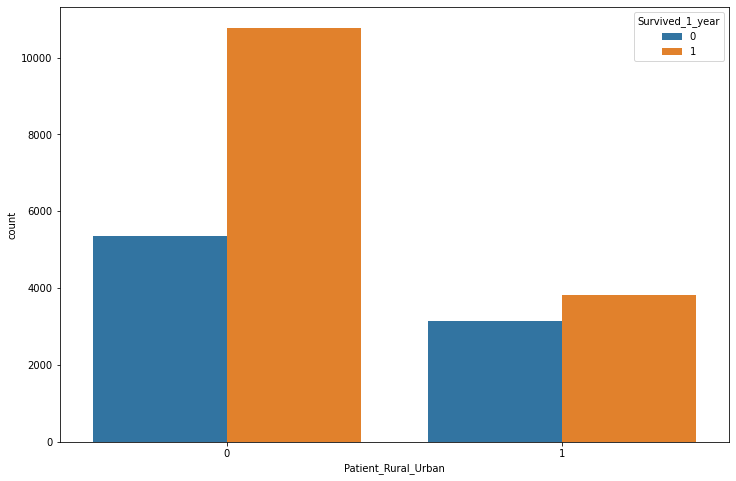

In [ ]:
#num of rural & urban
plt.figure(figsize=(12,8))
ax=sns.countplot(x=pharma_data.Patient_Rural_Urban,hue=pharma_data.Survived_1_year)

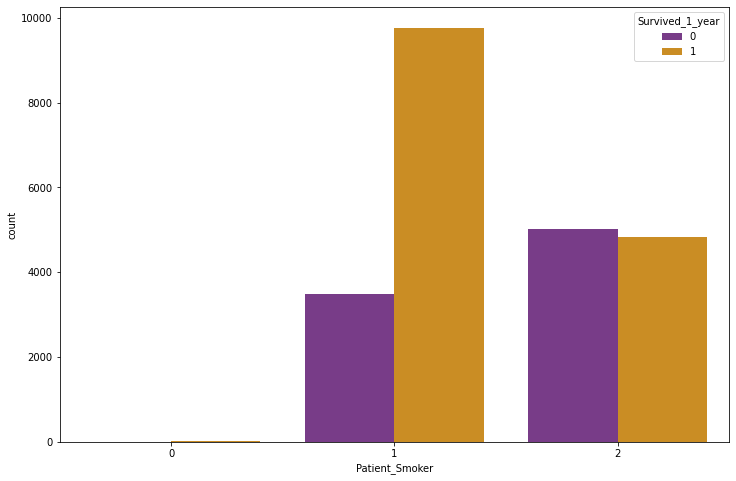

In [ ]:
#num of smoking,non-smoking ppl who survived
plt.figure(figsize=(12,8))
sns.countplot(pharma_data.Patient_Smoker, hue=pharma_data.Survived_1_year,palette='CMRmap')

plot reveals how non-smokers have survived more than smokers.

<Figure size 2160x720 with 0 Axes>

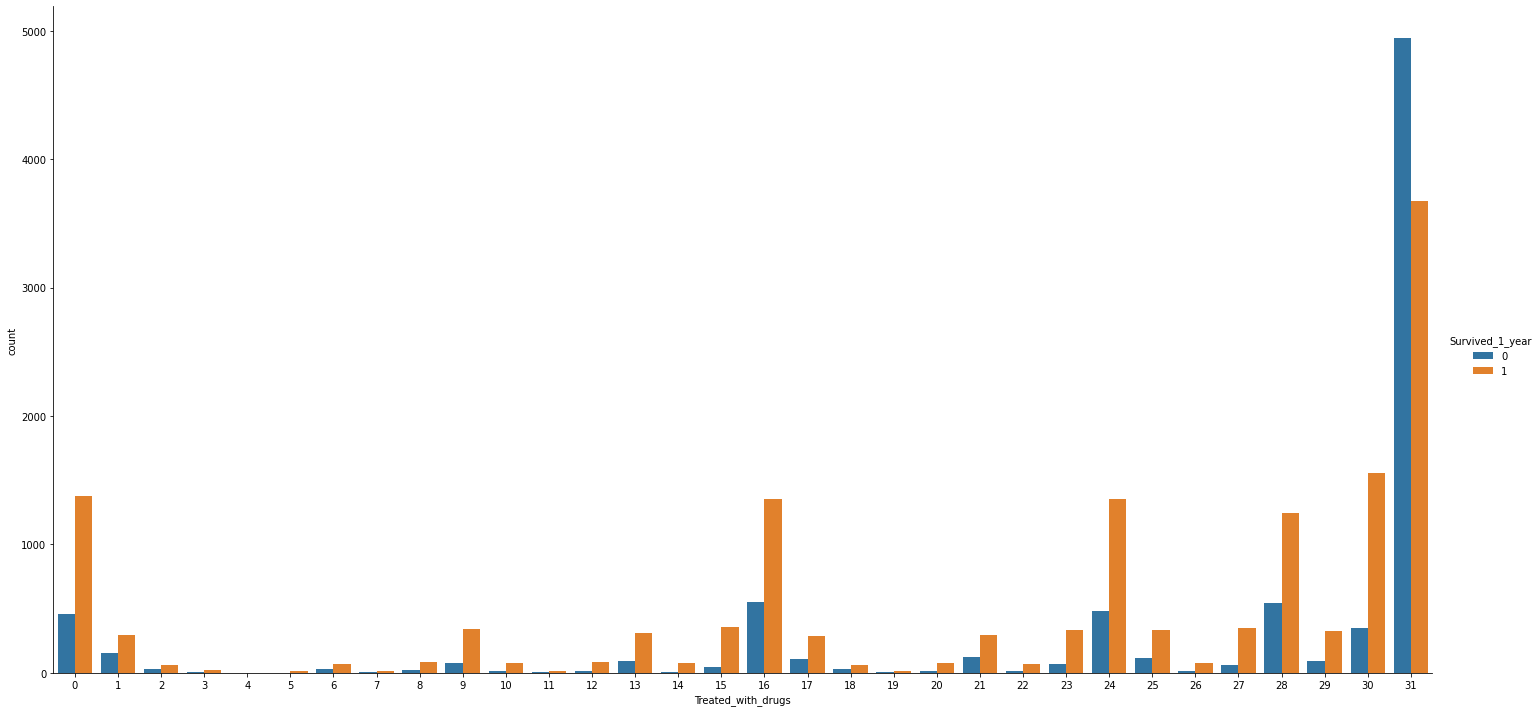

In [ ]:
plt.figure(figsize=(30,10))
g = sns.catplot(x="Treated_with_drugs", hue="Survived_1_year",data=pharma_data, kind="count",height=10,aspect=2)
plt.show()

<Figure size 2160x720 with 0 Axes>

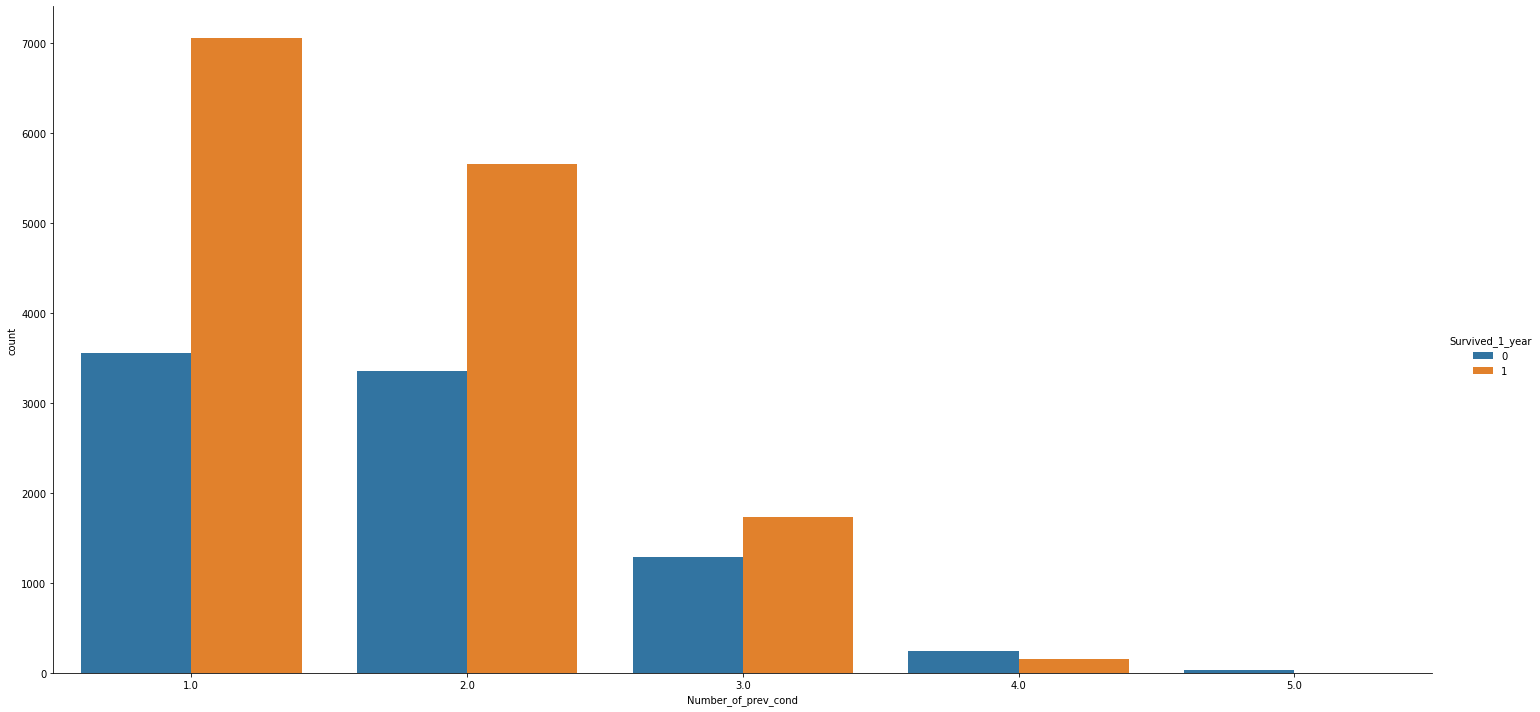

In [ ]:
plt.figure(figsize=(30,10))
g = sns.catplot(x="Number_of_prev_cond", hue="Survived_1_year",data=pharma_data, kind="count",height=10,aspect=2)
plt.show()

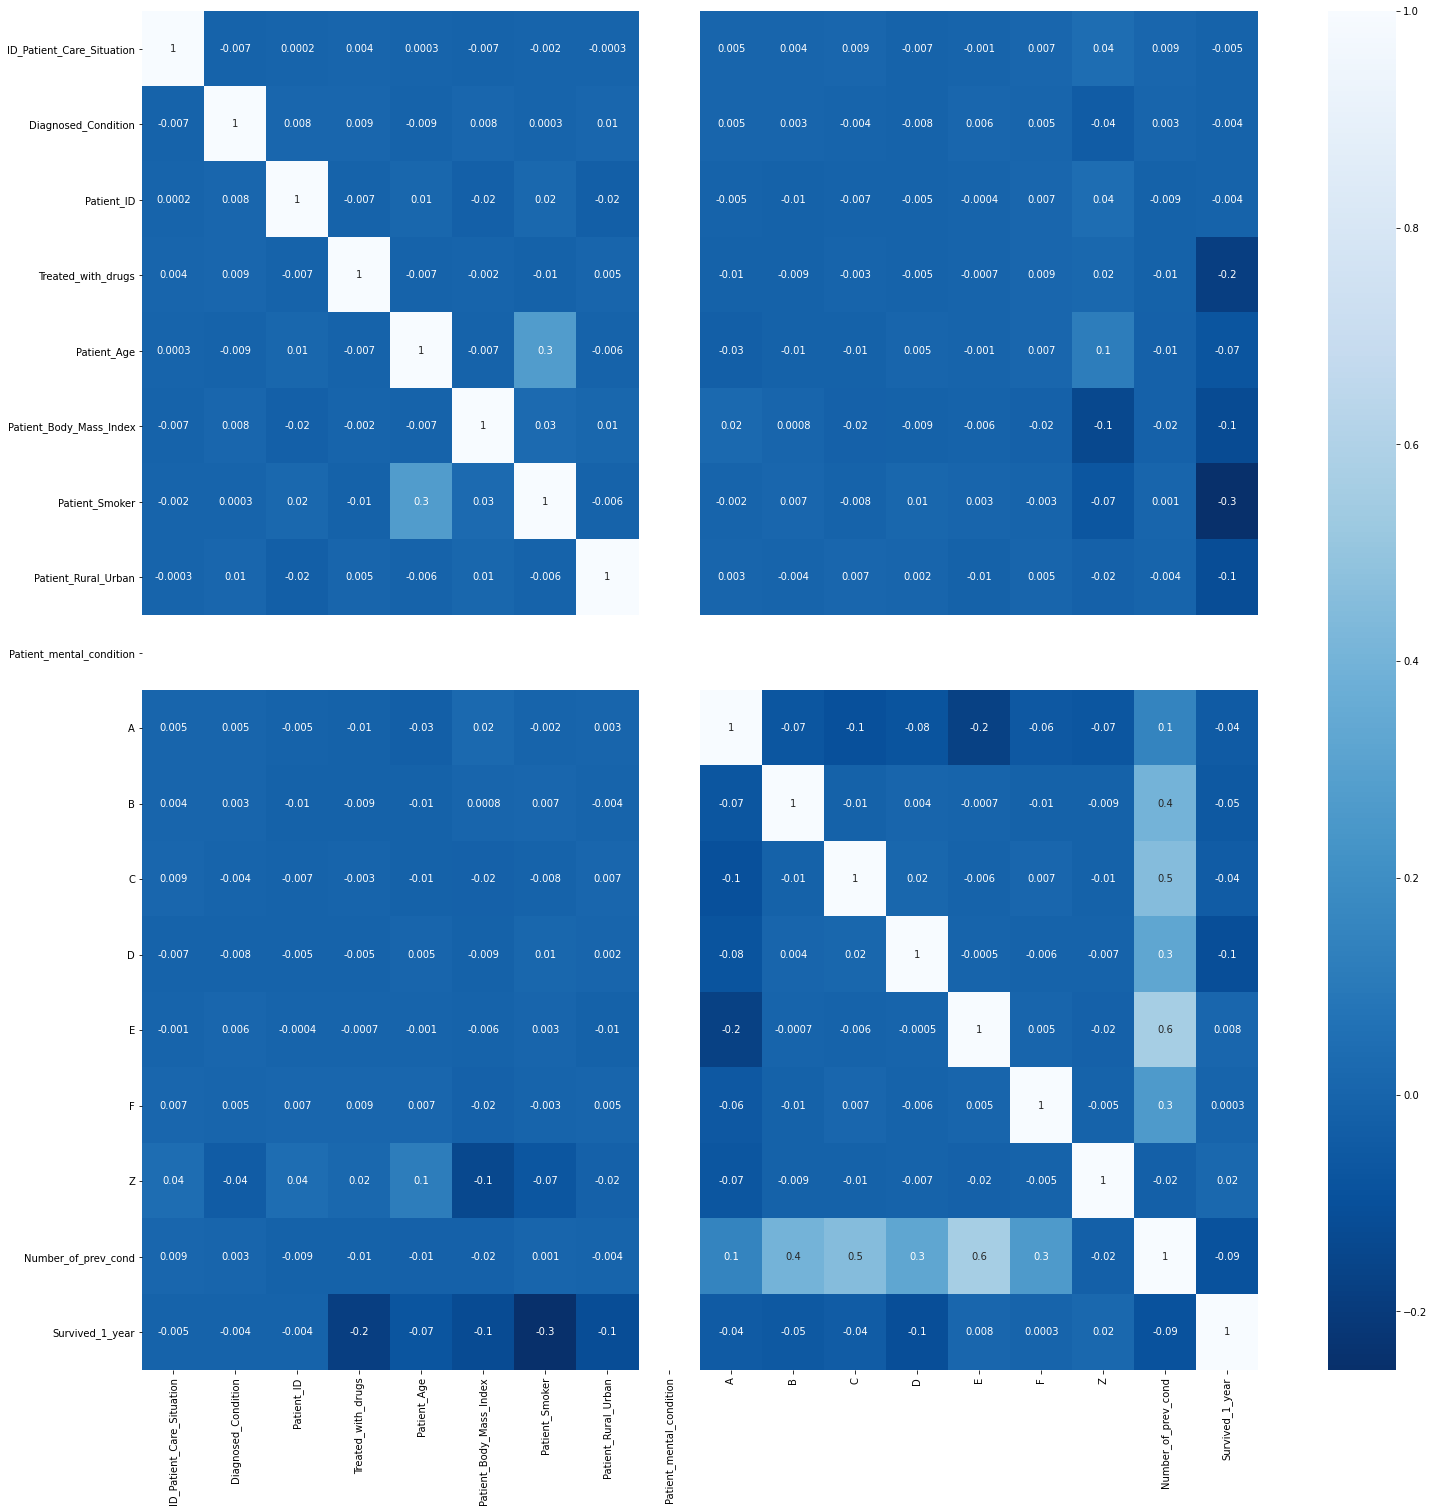

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data=pharma_data.corr(),cmap='Blues_r',fmt='.1g',annot=True)

model building

In [ ]:
#machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:
x=pharma_data.drop('Survived_1_year',axis=1)
y=pharma_data[['Survived_1_year']]

LOGISTIC REGRESSION

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=lr.predict(x_test)
print('Training accuracy...', f1_score(y_train, lr.predict(x_train)))
f1_lr=f1_score(y_test,y_pred)
print('F1 score is',f1_lr)

Training accuracy... 0.7693975530432089
F1 score is 0.7654142145767315


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_dt=dt.predict(x_test)
f1_dt=f1_score(y_test,y_pred_dt)
print('Training accuracy...', f1_score(y_train, dt.predict(x_train)))
print('F1 is',f1_dt)

Training accuracy... 1.0
F1 is 0.8068234209313048


In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data= export_graphviz(dt, out_file=None, 
                    feature_names=x_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True)


graph1=graphviz.Source(dot_data)


In [ ]:
dt_d=DecisionTreeClassifier(max_depth=9,criterion='entropy',max_leaf_nodes=100)
dt_d.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_d=dt_d.predict(x_test)
print('Training accuracy...', f1_score(y_train, dt_d.predict(x_train)))
print('Test accuracy...', f1_score(y_test, dt_d.predict(x_test)))

Training accuracy... 0.8481585832159388
Test accuracy... 0.8447131341868185


In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(dt_d, x_train, y_train, cv=10, scoring='accuracy')
print('Avarage train score...' , cv_score.mean())
print('Std train score...' , cv_score.std())

Avarage train score... 0.8080303674848883
Std train score... 0.00829388784403771


In [ ]:
from sklearn.model_selection import cross_val_score
for depth in range(2, 15):
    print('With depth:',depth)
    cv_score = cross_val_score(DecisionTreeClassifier(max_depth = depth, max_features = None,max_leaf_nodes=100), 
                               x_train, y_train, cv=10, scoring='accuracy')
    print('  Avarage train score...' , cv_score.mean())
    print('  Std train score...' , cv_score.std())

With depth: 2
  Avarage train score... 0.6915074052459002
  Std train score... 0.013795792248823598
With depth: 3
  Avarage train score... 0.748011019390283
  Std train score... 0.015882600346871518
With depth: 4
  Avarage train score... 0.7571030417876655
  Std train score... 0.015275833968510635
With depth: 5
  Avarage train score... 0.7631102677326284
  Std train score... 0.009910576262531747
With depth: 6
  Avarage train score... 0.7767489458745549
  Std train score... 0.007604151821309055
With depth: 7
  Avarage train score... 0.7921193136406997
  Std train score... 0.008852120399513531
With depth: 8
  Avarage train score... 0.7978018056659095
  Std train score... 0.008587110103346004
With depth: 9
  Avarage train score... 0.8094920802893191
  Std train score... 0.007845923807680587
With depth: 10
  Avarage train score... 0.8099792690615646
  Std train score... 0.007833795992968242
With depth: 11
  Avarage train score... 0.8100874941697898
  Std train score... 0.007893807910913084

TEST DATASET

In [ ]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')


In [ ]:
test_new['Treated_with_drugs']= le.fit_transform(test_new['Treated_with_drugs']) 
test_new['Patient_Smoker']= test_new['Patient_Smoker'].apply(lambda x:2 if x == 'YES' else(1 if x == 'NO' else 0))
test_new['Patient_Rural_Urban']= test_new['Patient_Rural_Urban'].apply(lambda x:1 if x == 'URBAN' else 0)  
test_new['Patient_mental_condition']= test_new['Patient_mental_condition'].apply(lambda x:1 if x == 'Stable' else 0) 
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   int64  
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   int64  
 7   Patient_Rural_Urban        9303 non-null   int64  
 8   Patient_mental_condition   9303 non-null   int64  
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [ ]:
survival=xgb_model.predict(test_new)
res=pd.DataFrame(survival)
res.index=test_new.index
res.columns=[['Survived']]

from google.colab import files
res.to_csv('survival_rf.csv')
files.download('survival_rf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

USING GRID SEARCH CV FOR DECISION TREE CLASSIFIER

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[i for i in range(7, 15)], 
              'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2', None]}

clf = GridSearchCV(DecisionTreeClassifier(max_leaf_nodes=100), param_grid, cv=10, verbose=2, scoring='accuracy')
clf.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] criterion=gini, max_depth=7, max_features=auto ..................
[CV] ... criterion=gini, max_depth=7, max_features=auto, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto ..................
[CV] ... criterion=gini, max_depth=7, max_features=auto, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto ..................
[CV] ... criterion=gini, max_depth=7, max_features=auto, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto ..................
[CV] ... criterion=gini, max_depth=7, max_features=auto, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto ..................
[CV] ... criterion=gini, max_depth=7, max_features=auto, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto ..................
[CV] ... criterion=gini, max_depth=7, max_features=auto, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ... criterion=gini, max_depth=7, max_features=auto, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto ..................
[CV] ... criterion=gini, max_depth=7, max_features=auto, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto ..................
[CV] ... criterion=gini, max_depth=7, max_features=auto, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=auto ..................
[CV] ... criterion=gini, max_depth=7, max_features=auto, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=7, max_features=sqrt, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=7, max_features=sqrt, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=7, max_features=sqrt, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=sqrt ..................
[CV] .

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:   34.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=100,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:

print('Best Hyperparameters:', clf.best_params_)
print('Score:', clf.best_score_)



Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': None}
Score: 0.8100874941697898


In [ ]:
print('train score...' , f1_score(y_train, clf.predict(x_train)))
print('test score...', f1_score(y_test, clf.predict(x_test)))

train score... 0.8609336129944882
test score... 0.8548776284039986


RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=14,n_estimators=190,criterion='gini',warm_start=True,min_samples_leaf=3,n_jobs=15)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=15, oob_score=False, random_state=None, verbose=0,
                       warm_start=True)

In [ ]:
y_pred_rf=rf.predict(x_test)
print('Training accuracy...', f1_score(y_train, rf.predict(x_train)))
f1_rf=f1_score(y_test,y_pred_rf)
print('F1 score is',f1_rf)

Training accuracy... 0.9360198624904508
F1 score is 0.8608841634023503


Feature Importances :  [0.00883003 0.0898798  0.00825021 0.11342585 0.06695869 0.10493394
 0.13606405 0.08504964 0.         0.05636344 0.05307239 0.14730531
 0.07404649 0.00980531 0.01351592 0.         0.03249891]


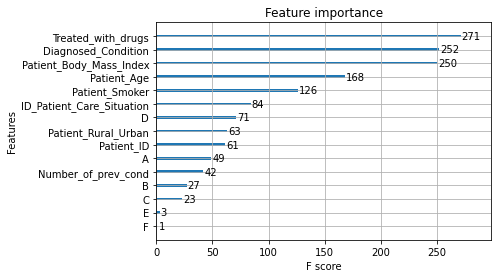

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(max_depth=4,n_estimators=100,learning_rate=0.1)
xgb_model.fit(x_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [ ]:
y_pred_xgb=xgb_model.predict(x_test)
f1_xgb=f1_score(y_test,y_pred_xgb)
print(f1_xgb)

0.86755731486063


In [ ]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= dt , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(x_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 8
Selected Features: [ True  True  True  True  True  True  True False False False False False
 False False False False  True]
Feature Ranking: [ 1  1  1  1  1  1  1  2 10  3  6  5  4  7  8  9  1]


In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,ID_Patient_Care_Situation,1
6,Patient_Smoker,1
5,Patient_Body_Mass_Index,1
4,Patient_Age,1
16,Number_of_prev_cond,1
2,Patient_ID,1
1,Diagnosed_Condition,1
3,Treated_with_drugs,1
7,Patient_Rural_Urban,2
9,A,3


In [ ]:
X_train_rfe = rfe.transform(x_train)
X_test_rfe = rfe.transform(x_test)

# Fitting our baseline model with the transformed data
dt_rfe_model = dt.fit(X_train_rfe, y_train)

In [ ]:
# making predictions and evaluating the model
from sklearn.metrics import accuracy_score,f1_score
y_pred_rfe = dt_rfe_model.predict(X_test_rfe)

rfe_ac = accuracy_score(y_test, y_pred_rfe)
rfe_fscore = f1_score(y_test ,y_pred_rfe)

print("RFE Model Accuracy:", rfe_ac)
print("RFE Model F1 Score:", rfe_fscore)

RFE Model Accuracy: 0.7411255411255411
RFE Model F1 Score: 0.7927927927927929


BORUTA

In [ ]:
!pip install boruta


     |████████████████████████████████| 61kB 1.9MB/s 


In [ ]:
from boruta import BorutaPy

In [ ]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(x_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
I

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None,
                                          criterion='entropy', max_depth=13,
                                          max_features='auto',
                                          max_leaf_nodes=10000,
                                          max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=26, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FB3016F5EB8,
                        

In [ ]:
# check selected features
print("Selected Features: ", boruta_selector.support_)
 
# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False  True False  True  True  True  True False False False False False
 False False False False False]
Ranking:  [ 3  1  2  1  1  1  1  4 13  7  9  8  5 10 11 12  6]
No. of significant features:  5


In [ ]:
# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
1,Diagnosed_Condition,1
3,Treated_with_drugs,1
4,Patient_Age,1
5,Patient_Body_Mass_Index,1
6,Patient_Smoker,1
2,Patient_ID,2
0,ID_Patient_Care_Situation,3
7,Patient_Rural_Urban,4
12,D,5
16,Number_of_prev_cond,6


In [ ]:
x_important_train = boruta_selector.transform(np.array(x_train))
x_important_test = boruta_selector.transform(np.array(x_test))

In [ ]:


# Train the new classifier on the new dataset containing the most important features
rf.fit(x_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=13, max_features='auto',
                       max_leaf_nodes=10000, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=-1,
                       oob_score=False,
                       random_state=RandomState(MT19937) at 0x7FB3016F5EB8,
                       verbose=0, warm_start=False)

In [ ]:
# Apply The Limited Featured Classifier To The Test Data
y_important_pred = rf.predict(x_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
rf_imp_ac = accuracy_score(y_test, y_important_pred)
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Boruta Model Accuracy:", rf_imp_ac)
print("Limited Features Boruta Model F1 Score:", rf_imp_fscore)

Limited Features Boruta Model Accuracy: 0.7909090909090909
Limited Features Boruta Model F1 Score: 0.8405940594059406


NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb=nb.predict(x_test)
print(f1_score(y_test,y_pred_nb))

0.8041547493602287


SGD classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred_sg=sgd.predict(x_test)
print(f1_score(y_test,y_pred_sg))

0.7702811244979919


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10000)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10000, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn=knn.predict(x_test)
print(f1_score(y_test,y_pred_knn))

0.7738853503184713


In [ ]:
from sklearn.svm import SVC
svm=SVC(C=0.5)
svm.fit(x_train,y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svm=svm.predict(x_test)
print(f1_score(y_test,y_pred_svm))

0.7738853503184713
